#Car Sales Analysis 

##Importing Libraries and Previewing

In [16]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
import seaborn as sns

%matplotlib inline

pd.set_option('display.max_columns', None)

###Reading Base CSV File

In [17]:
df = pd.read_csv("base.csv")
df.head()

/var/folders/bz/qn5mlq854vb2dwhptzd1hffr0000gn/T/ipykernel_2419/293375903.py:1: DtypeWarning: Columns (7,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("base.csv")


,vin,back_legroom,city,city_fuel_economy,daysonmarket,dealer_zip,engine_cylinders,fleet,franchise_dealer,franchise_make,front_legroom,height,highway_fuel_economy,horsepower,interior_color,isCab,is_new,latitude,length,listed_date,listing_id,longitude,major_options,maximum_seating,mileage,model_name,owner_count,price,savings_amount,seller_rating,sp_id,sp_name,transmission,wheel_system,wheelbase,width,model_year,BodyType,ExteriorColor,MakeName,TrimName,RPM_power
0,3MYDLBZV2GY132469,34.4,Tinley Park,33,39,60477,I4,False,True,Audi,41.9,58.5,42,106,NaN,False,False,41.6020,171.7,8/1/20,278199087,-87.8143,"['Alloy Wheels', 'Backup Camera']",5,68980,iA,1.0,9400.0,853,4.200000,288457,International Autos Orland Park,A,FWD,101.2,66.7,2016,Sedan,Silver,Scion,Base,"6,000"
1,3MYDLBZV5GY136600,34.4,Freehold,33,55,7728,I4,False,True,BMW,41.9,58.5,42,106,Mid Blue Black,False,False,40.2751,171.7,7/17/20,276803948,-74.2941,"['Alloy Wheels', 'Bluetooth', 'Backup Camera']",5,35407,iA,2.0,10990.0,589,4.166667,339415,BMW Of Freehold,A,FWD,101.2,66.7,2016,Sedan,Abyss,Scion,Base,"6,000"
2,3MYDLBZV4GY114796,34.4,Toms River,33,45,8753,I4,False,True,Buick,41.9,58.5,42,106,Gray,False,False,39.9612,171.7,7/27/20,277668913,-74.1811,"['Alloy Wheels', 'Bluetooth', 'Backup Camera']",5,81496,iA,2.0,10937.0,612,4.000000,293684,Lester Glenn Buick GMC,A,FWD,101.2,66.7,2016,Sedan,Frost,Scion,Base,"6,000"
3,3MYDLBYV7HY159217,34.4,Saco,32,21,4072,I4,False,True,Chevrolet,41.9,58.5,40,106,Mid Blue Black,False,False,43.5368,171.7,8/19/20,279713158,-70.4217,"['Alloy Wheels', 'Bluetooth', 'Backup Camera']",5,64720,Yaris iA,3.0,11000.0,635,4.916667,49556,Ira Jack Chevrolet Cadillac,A,FWD,101.2,66.7,2017,Sedan,Blue,Toyota,Sedan,"6,000"
4,3MYDLBYVXHY161043,34.4,Oxford,32,38,4270,I4,False,True,Chevrolet,41.9,58.5,40,106,NaN,False,False,44.1959,171.7,8/2/20,278267910,-70.5265,"['Navigation System', 'Alloy Wheels', 'Bluetoo...",5,14597,Yaris iA,1.0,12995.0,987,3.857143,293051,Goodwin Chevrolet Buick,A,FWD,101.2,66.7,2017,Sedan,Red,Toyota,Sedan,"6,000"


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43167 entries, 0 to 43166
Data columns (total 42 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   vin                   43167 non-null  object 
 1   back_legroom          43167 non-null  float64
 2   city                  43167 non-null  object 
 3   city_fuel_economy     43167 non-null  int64  
 4   daysonmarket          43167 non-null  int64  
 5   dealer_zip            43167 non-null  int64  
 6   engine_cylinders      43167 non-null  object 
 7   fleet                 38408 non-null  object 
 8   franchise_dealer      43167 non-null  bool   
 9   franchise_make        43167 non-null  object 
 10  front_legroom         43167 non-null  float64
 11  height                43167 non-null  float64
 12  highway_fuel_economy  43167 non-null  int64  
 13  horsepower            43167 non-null  int64  
 14  interior_color        38063 non-null  object 
 15  isCab              

In [19]:
df.describe()

,back_legroom,city_fuel_economy,daysonmarket,dealer_zip,front_legroom,height,highway_fuel_economy,horsepower,latitude,length,listing_id,longitude,maximum_seating,mileage,owner_count,price,savings_amount,seller_rating,sp_id,wheelbase,width,model_year
count,43167.000000,43167.000000,43167.000000,43167.000000,43167.000000,43167.000000,43167.000000,43167.000000,43167.000000,43167.000000,4.316700e+04,43167.000000,43167.000000,43167.000000,38408.000000,43167.000000,43167.000000,43167.000000,43167.000000,43167.000000,43167.000000,43167.000000
mean,37.422547,25.131304,46.088609,16842.213913,42.440881,62.880911,32.598397,166.037876,41.409485,180.493108,2.777837e+08,-75.980825,5.108393,35774.869020,1.214643,18997.674863,681.007274,4.167781,206887.572822,105.569894,73.328341,2017.161952
std,2.016211,2.910294,68.698447,17474.192995,1.055494,4.399814,3.883096,19.771464,1.647441,7.781157,5.549614e+06,5.884327,0.470996,31221.351348,0.515556,6261.489278,679.546021,0.568503,126263.154444,2.756337,3.943027,2.372626
min,0.000000,14.000000,0.000000,1001.000000,38.400000,50.600000,17.000000,93.000000,21.296800,139.600000,1.448600e+08,-157.913000,2.000000,0.000000,1.000000,495.000000,0.000000,1.000000,41928.000000,90.600000,65.400000,1991.000000
25%,36.100000,23.000000,12.000000,5495.000000,41.600000,57.900000,30.000000,152.000000,40.503100,176.200000,2.772187e+08,-76.622000,5.000000,15432.500000,1.000000,15054.000000,147.000000,3.857143,65005.000000,104.200000,70.800000,2017.000000
50%,37.900000,25.000000,26.000000,11220.000000,42.500000,64.800000,32.000000,170.000000,41.536000,182.100000,2.793523e+08,-74.174100,5.000000,29722.000000,1.000000,18227.000000,497.000000,4.250000,274035.000000,105.700000,72.400000,2017.000000
75%,38.300000,27.000000,49.000000,19428.000000,43.000000,66.500000,35.000000,180.000000,42.455300,184.500000,2.806467e+08,-72.626800,5.000000,45510.500000,1.000000,22420.000000,1011.000000,4.563068,295254.000000,106.500000,73.200000,2019.000000
max,41.700000,40.000000,1566.000000,99352.000000,45.800000,79.300000,45.000000,304.000000,48.463500,212.300000,2.817092e+08,-67.226700,8.000000,341690.000000,7.000000,208070.000000,5449.000000,5.000000,440352.000000,127.800000,84.600000,2021.000000


In [20]:
df.shape

(43167, 42)

##Cleaning the Data

In [21]:
#Correct Data Types
df['dealer_zip'] = df['dealer_zip'].astype(object);
df['fleet'] = df['fleet'].astype(bool);
df['isCab'] = df['isCab'].astype(bool);
df['listed_date'] = pd.to_datetime(df['listed_date'], format='%m/%d/%y');
df['RPM_power'] = df['RPM_power'].str.replace(',', '').astype(int)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43167 entries, 0 to 43166
Data columns (total 42 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   vin                   43167 non-null  object        
 1   back_legroom          43167 non-null  float64       
 2   city                  43167 non-null  object        
 3   city_fuel_economy     43167 non-null  int64         
 4   daysonmarket          43167 non-null  int64         
 5   dealer_zip            43167 non-null  object        
 6   engine_cylinders      43167 non-null  object        
 7   fleet                 43167 non-null  bool          
 8   franchise_dealer      43167 non-null  bool          
 9   franchise_make        43167 non-null  object        
 10  front_legroom         43167 non-null  float64       
 11  height                43167 non-null  float64       
 12  highway_fuel_economy  43167 non-null  int64         
 13  horsepower      

Data types were converted successfully

In [23]:
df.isnull().sum()

vin                        0
back_legroom               0
city                       0
city_fuel_economy          0
daysonmarket               0
dealer_zip                 0
engine_cylinders           0
fleet                      0
franchise_dealer           0
franchise_make             0
front_legroom              0
height                     0
highway_fuel_economy       0
horsepower                 0
interior_color          5104
isCab                      0
is_new                     0
latitude                   0
length                     0
listed_date                0
listing_id                 0
longitude                  0
major_options              0
maximum_seating            0
mileage                    0
model_name                 0
owner_count             4759
price                      0
savings_amount             0
seller_rating              0
sp_id                      0
sp_name                    0
transmission               0
wheel_system               0
wheelbase     

Three columns have a substantial amount of null values but I am not going to remove them since it may be useful despite the null values.

In [24]:
#Drop Duplicates by VIN
df_drop = df.drop_duplicates(subset=['vin'], keep='first')

###Outliers

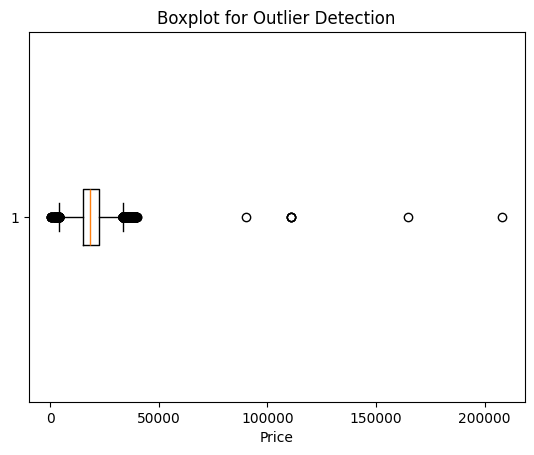

In [25]:
#Checking outliers on price
plt.boxplot(df['price'], vert=False)
plt.title("Boxplot for Outlier Detection")
plt.xlabel("Price")
plt.show()

There are some very high priced cars that are outliers. Lets check those out to see if their prices align with the car type.

In [26]:
df[df['price']>50000]

,vin,back_legroom,city,city_fuel_economy,daysonmarket,dealer_zip,engine_cylinders,fleet,franchise_dealer,franchise_make,front_legroom,height,highway_fuel_economy,horsepower,interior_color,isCab,is_new,latitude,length,listed_date,listing_id,longitude,major_options,maximum_seating,mileage,model_name,owner_count,price,savings_amount,seller_rating,sp_id,sp_name,transmission,wheel_system,wheelbase,width,model_year,BodyType,ExteriorColor,MakeName,TrimName,RPM_power
43,3MYDLBYV2HY194439,34.4,Avenel,32,0,7001,I4,False,True,Toyota,41.9,58.5,40,106,NaN,False,False,40.5732,171.7,2020-09-09,281592031,-74.2912,"['Alloy Wheels', 'Backup Camera']",5,29376,Yaris iA,1.0,111111.0,0,2.000000,293271,Sansone's Route 1 Toyota,A,FWD,101.2,66.7,2017,Sedan,Blue,Toyota,Sedan,6000
8450,NMTKHMBXXJR013001,31.7,Avenel,27,0,7001,I4,False,True,Toyota,43.5,61.6,31,144,NaN,False,False,40.5732,171.2,2020-09-09,281592032,-74.2912,"['Alloy Wheels', 'Backup Camera']",5,37269,C-HR,1.0,111111.0,0,2.000000,293271,Sansone's Route 1 Toyota,CVT,FWD,103.9,70.7,2018,SUV / Crossover,White,Toyota,XLE,6100
9775,4S3GTAT64J3701734,36.5,Branford,28,30,6405,H4,False,True,Subaru,43.1,58.9,37,152,White (Ivory),False,False,41.2876,175.6,2020-08-10,278912748,-72.8136,"['Leather Seats', 'Sunroof/Moonroof', 'Adaptiv...",5,32935,Impreza,1.0,208070.0,0,4.588235,67375,Premier Subaru,CVT,AWD,105.1,79.9,2018,Hatchback,Crystal White Pearl,Subaru,2.0i Limited Hatchback AWD,6000
15293,1HGCP2F68CA085718,37.2,Englewood,23,7,7631,I4,False,True,INFINITI,42.5,58.1,34,177,White (Ivory),False,False,40.8787,194.9,2020-09-02,280968596,-73.9824,"['Leather Seats', 'Alloy Wheels', 'Heated Seats']",5,132877,Accord,2.0,89995.0,0,3.425000,407367,INFINITI of Englewood,A,FWD,110.2,72.7,2012,Sedan,Taffeta White,Honda,SE,6500
19123,1FMCU0F74HUD33730,37.3,Lawrenceville,21,36,8648,I4,False,True,Ford,43.1,66.3,29,168,Charcoal Black,False,False,40.2730,178.1,2020-08-05,278410148,-74.7086,"['Steel Wheels', 'Bluetooth', 'Backup Camera',...",5,167735,Escape,1.0,164980.0,0,4.100000,274154,Lawrenceville Ford Lincoln,A,FWD,105.9,81.8,2017,SUV / Crossover,Canyon Ridge Metallic,Ford,S FWD,6000
20615,2T3JFREV9HW689037,37.2,Avenel,22,0,7001,I4,False,True,Toyota,42.6,67.5,28,176,NaN,False,False,40.5732,183.5,2020-09-09,281592029,-74.2912,"['Sunroof/Moonroof', 'Backup Camera', 'Heated ...",5,35543,RAV4,1.0,111111.0,0,2.000000,293271,Sansone's Route 1 Toyota,A,AWD,104.7,72.6,2017,SUV / Crossover,White,Toyota,SE AWD,6000
20617,2T3BFREV2HW689935,37.2,Avenel,22,0,7001,I4,False,True,Toyota,42.6,67.1,28,176,NaN,False,False,40.5732,183.5,2020-09-09,281592030,-74.2912,"['Bluetooth', 'Backup Camera']",5,33679,RAV4,1.0,111111.0,0,2.000000,293271,Sansone's Route 1 Toyota,A,AWD,104.7,72.6,2017,SUV / Crossover,Black,Toyota,LE AWD,6000


These are all average cars that are not even new. There is a mistake in the price of these so lets remove them.

In [27]:
#Filter data to keep rows with price lower than 50,000
df = df[df['price'] <= 50000]

###Exploring the Data

In [28]:
#Creating a Correlation Matrix and Numerizing Object Columns
df_numerized = df.copy()

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
corr_matrix = df_numerized.corr()
filtered_corr_matrix = corr_matrix.where(corr_matrix.abs() > 0.6)
                                        
filtered_corr_matrix[filtered_corr_matrix < 1].unstack().sort_values(ascending=False).head(100).dropna()

listing_id            listed_date             0.997240
listed_date           listing_id              0.997240
fleet                 isCab                   0.978391
isCab                 fleet                   0.978391
city_fuel_economy     highway_fuel_economy    0.891569
highway_fuel_economy  city_fuel_economy       0.891569
wheelbase             length                  0.889209
length                wheelbase               0.889209
model_year            price                   0.736882
price                 model_year              0.736882
isCab                 is_new                  0.688273
is_new                isCab                   0.688273
                      fleet                   0.673371
fleet                 is_new                  0.673371
MakeName              franchise_make          0.655488
franchise_make        MakeName                0.655488
is_new                price                   0.629082
price                 is_new                  0.629082
mileage   

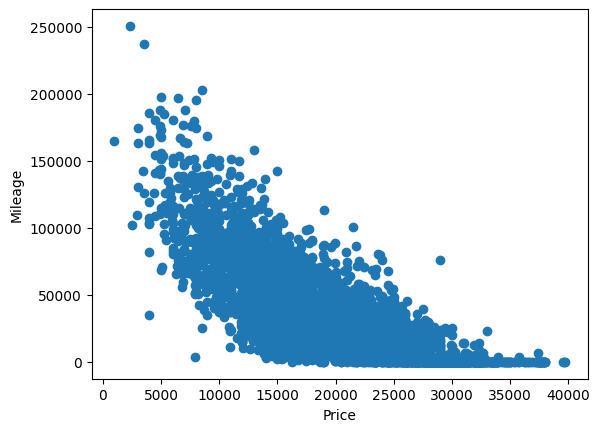

In [29]:
df_sample = df_numerized.sample(5000)  # Randomly sample 5000 rows for plotting
plt.scatter(df_sample['price'], df_sample['mileage'])
plt.xlabel("Price")
plt.ylabel("Mileage")
plt.show()

In [30]:
#Exporting CSV
df.to_csv('baseCleaned.csv', index=False)